# <center> PCA

# <center> Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10, n_features=2, n_classes=2, n_redundant=0, class_sep=0.25, random_state=4)

Text(0, 0.5, 'X2')

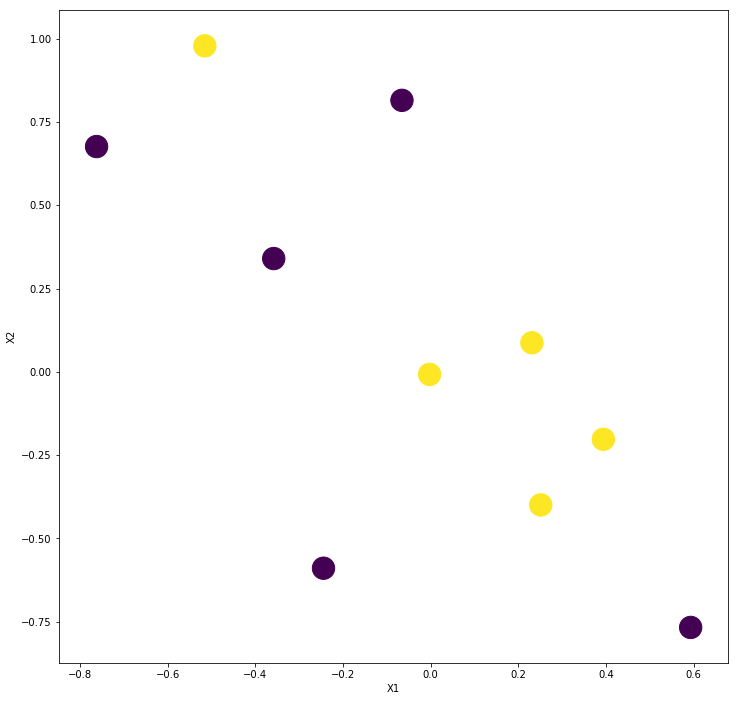

In [2]:
plt.figure(figsize=(12,12))
plt.scatter(X[:,0], X[:,1],c=y, s=500); plt.xlabel('X1'); plt.ylabel('X2')

<center> <a href="https://www.youtube.com/watch?v=BfTMmoDFXyE">YouTube video</a>

<center><img src="pca.gif">

## <center> Curse of Dimensionality

### <center> As the number of features or dimensions grows, the amount of data we need to generalize accurately grows exponentially.

### <center> PCA == Dimensionality Reduction

 ### <center>Understanding the math behind PCA<br>
<center><a href="https://www.youtube.com/watch?v=kYB8IZa5AuE">Linear Transformations</a><br>
<a href="https://www.youtube.com/watch?v=PFDu9oVAE-g">Eigenvectors</a><br>
<a href="https://www.youtube.com/watch?v=FgakZw6K1QQ">Step-by-step PCA</a>

In [ ]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['Iris type'] = y 
df.head()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
X_pc = pca.transform(X)

<center><img src="pca_iris.png">

In [ ]:
X_pc

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=4,test_size=0.15)

In [ ]:
X_train_pc = pca.transform(X_train)
X_test_pc = pca.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
base_clf = RandomForestClassifier().fit(X_train,y_train)
pc_clf = RandomForestClassifier().fit(X_train_pc,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
print('Base Train Accuracy: ', accuracy_score(y_train, base_clf.predict(X_train)))
print('Base Test Accuracy: ', accuracy_score(y_test, base_clf.predict(X_test)))
print('PC Train Accuracy: ', accuracy_score(y_train, pc_clf.predict(X_train_pc)))
print('PC Accuracy: ', accuracy_score(y_test, pc_clf.predict(X_test_pc)))

In [ ]:
## Two principal components
pca = PCA(n_components=2)
pca.fit(X)
X_train_pc = pca.transform(X_train)
X_test_pc = pca.transform(X_test)
pc_clf = RandomForestClassifier().fit(X_train_pc,y_train)
print('PC Train Accuracy: ', accuracy_score(y_train, pc_clf.predict(X_train_pc)))
print('PC Accuracy: ', accuracy_score(y_test, pc_clf.predict(X_test_pc)))

In [ ]:
## MNIST handwritten digits dataset - 8x8 images
digits = datasets.load_digits()
digits.data.shape

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
pca_data = pca.fit_transform(digits.data)

In [ ]:
plt.scatter(pca_data[:, 0], pca_data[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### <center> Explained Variance for n-Components

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### <center> Other Dimensionality Reduction Methods

<center> t-distributed stochastic neighbor embedding (t-Sne)

<center> Singular value decomposition (SVD)

## <center> Activity

<b> Part I 

The data found in <i>Wine.csv</i> contains various features of three types of wine. 

<b>1)</b> Load in the data and explore the features. 

<b>2)</b> Conduct PCA on the data using two principal components.

<b>3)</b> Compare the explained variance for PC1 and PC2. 

<b>4)</b> Now standardize the features, conduct a new PCA and compare the explained variances. What does this tell you?

<b> Part II

<b>1)</b> Run the cell below to load the dataset.

In [ ]:
X,y = make_classification(n_samples=15000, n_features=300, n_classes=4, n_redundant=0, class_sep=2, n_informative=300, random_state=4)

<b>2)</b> Perform a train-test split with a test size of 0.15 and random state of 4.

<b>3)</b> Fit a classifier of your choice to the data and record its performance on the train and test set. Also, record the amount of time it takes to fit to the data.

In [ ]:
import time
start = time.time()
## fit model
print('Took', np.round(time.time()-start,2), 'seconds.')

<b>4)</b> Conduct PCA on the data, choosing an appropriate number of principal components.

<b>5)</b> Compare the train and test performance of the reduced data. Also, record the amount of time it takes to fit to the data.